In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

<hr style="border-top: 5px solid black;">

<div class="alert alert-block alert-info" style="font-size:20px; border:1px solid black; padding:10px">
<center><h1>Post Goals:</h1></center>
    <hr style="border-top: 2px dashed black;">
    <ol>
        <li>Provide an introduction to power analysis.</li><br>
        <li>Demonstrate how to perform a power analysis for a T-Test for two Independent Groups using Python.</li><br>
    </ol>
</div>

<hr style="border-top: 5px solid black;">

<div style="font-size:16px; border:1px solid black; padding:10px">
<center><h1><br><font color="blue">Post Overview.</font></h1></center>
    <ol>
        <li><a href="#objective1">Introduction to power analysis.</a></li><br>
        <li><a href="#objective2">Introduction to power analysis.</a></li><br>
        <li><a href="#objective3">Demonstrate how to perform a power analysis on a T-test for two independent samples using Python.</a></li><br>
        <li><a href="#objective4">Python code explained.</a></li><br>
        <li><a href="#objective5">Special considerations.</a></li><br>
<!--         <li><a href="#objective6">.</a></li><br> -->
    </ol>
</div>

<hr style="border-top: 5px solid black;">

<div id="objective1" class="alert alert-block alert-warning" style="font-size:16px; border:1px solid black; padding:10px"><center><h1><br><font color="blue">Introduction to Power Analysis.</font></h1></center><br>
</div>
<div style="font-size:16px; border:1px solid black; padding:10px">
    <ul><strong><u>Motivation</u></strong>
        <li>During a study design, one of the key questions is <em>"what is the optimal sample size needed to state statistical significance?"</em></li><br>        
        <li>An adequate sample size is essential to draw confident conclusions from the analysis.</li><br> 
        <li>One common used method to determine the sample size is using a <strong>power analysis</strong>.</li><br> 
        <li>A <strong>Power analysis</strong> is a method used to estimate the sample size needed to capture a specific effect at the desired significance level, and statistical power.</li><br>
        <li><strong>Power analysis</strong> depends on four related variables:
            <ul>
                <li><strong><u>Effect size</u>:</strong> is the quantitative measure of the strength of a phenomenon and emphasizes the difference or relationship.</li><br>
                <li><strong><u>Sample size</u>:</strong> is the total number of instances in the study.</li><br>
                <li><strong><u>Level of Significance \(\alpha \)</u>:</strong> is the probability of rejecting the null hypothesis when the null hypothesis is true.</li><br>
                <li><strong><u>Statistical Power</u>:</strong> is the probability of rejecting the null hypothesis when it is false.</li><br>
            </ul></li><br>
    </ul>
    <hr style="border-top: 2px dashed black;">
    <ul><strong><u>Reasons to perform a power analysis</u></strong>
        <li>To determine the number of trials or samples needed to get an effect of a certain size. This will help avoid incorrectly rejecting the null hypothesis.</li><br>
        <li>To find the power of a given effect ans sample size.  This is useful when there are budget constraints and you want to determine the if a specific size is enough to detect an effect.</li><br>
        <li>To validate your research.</li><br>
    </ul>
    <hr style="border-top: 2px dashed black;">
    <ul><strong><u>Example Case</u></strong>
        <li>An exercise scientist wants to compare two different diets A and B on muscle growth.  The scientist hypothesizes that diet A (group 1) will be better than diet B (Group 2) in muscle growth.</li><br>
        <li>The scientist wants to recruit a random sample of weight trainers and assign them to either of the two diets.</li><br>
        <li>At the end of the 12 week experiment, the muscle mass will be measured by MRI scan.</li><br>
        <li>The scientist expects the average difference in muscle mass measured between the two groups to be around 10 mm, and a standard deviation of muscle mass distribution for diet A to be 15 mm and 20 mm for diet B. </li><br>
        <li>The scientist now wants to know how many subjects are needed in each group (assuming equal sized groups).</li><br>
        <li>In this example, the power analysis will be specific for a t-test for two independent groups with common variance.</li><br>
        <li>The power analysis formula used will depend on the statistical model.</li><br>
        <li>The following section will define the variables used in a power analysis, and provide examples.</li><br>
    </ul>
    <hr style="border-top: 2px dashed black;">
    <ul><strong><u>Effect Size</u>:</strong> is the quantitative measure of the strength of a phenomenon and emphasizes the difference or relationship.
        <li>
            <ul><strong><u>Model Specific Examples</u></strong>
                <li>The correlation between two variables \(r^{2}\)</li>
                <li>The regression coefficient in a regression (\(B_{0},\ B_{2},\ B_{3}\))</li>
                <li>The mean difference in t tests (Cohen's D)</li>
                <li>The mean difference in ANOVA (use \(\eta\))</li>
            </ul>
        </li>
    </ul>
    <ul><strong><u>Sample Size</u></strong>
        <li>is the number of instances in a subset taken from a population, and is used to learn more about the population.</li>
    </ul>
    <ul><strong><u>Level of Significance \(\alpha\)</u></strong>
        <li>is a measure of the strength of the evidence that must be present in the sample before you can reject the null hypothesis and decide if the effect you observe is statistically significant.</li>
        <li>The level of significance is the probability of rejecting the null hypothesis when it is true.</li>
        <li>Common level of significance are 0.05 and 0.01.  An alpha of 0.05 indicates a 5% risk of stating a difference exists when in fact, there is no difference.</li>
    </ul>
    <ul><strong><u>Statistical Power</u></strong>
        <li>is the probability that the test correctly rejects the null hypothesis.</li><br>
    </ul>    
</div>

<hr style="border-top: 5px solid black;">

<div id="objective2" class="alert alert-block alert-warning" style="font-size:16px; border:1px solid black; padding:10px"><center><h1><br><font color="blue">Mathematic Intuition for T-test two independent sample Power Analysis</font></h1></center><br>
</div>
<div style="font-size:16px; border:1px solid black; padding:10px">
    <ul><strong><u>Two-test for independent samples</u></strong>
        <li>A statistical test that compares the means of a continuous outcome variable between two independent groups.</li><br>
        <li>This is a parametric test and the data needs to follow a normal distribution.</li><br>
        <li>The null hypothesis \(H_{0}: \mu_{1} - \mu_{2} \)</li><br>
        <li>Where \(\mu_{1}\) and \(\mu_{2}\) are the means of the two independent groups.</li><br>
        <li>The formula for determining the sample sizes that ensures the test has a specific power is:
            \[sample\ size = n_{i}= 2(\frac{Z_{1-\frac{\alpha}{2}} + Z_{1-\beta}}{|\frac{\mu_{1} = \mu_{2}}{\sigma}|})^{2} \]
            <ul style="list-style: none;">
                <li>where \(n_{i}\) is the sample size required in each group (i=1,2)</li>
                <li> \(\alpha\) is the selected level of significance</li>
                <li>\(Z_{1-\frac{\alpha}{2}}\) is the value from the standard normal distribution holding 1 - \(\frac{\alpha}{2}\) below it.</li>
                <li>1-\(\beta\) is the selected power and \(Z_{1-\beta}\) is the value from the normal distribution holding 1 - \(\beta \) below it.</li>
            </ul>
        </li><br>
        <li>The effect size is defined as \(ES =|\frac{\mu_{1} = \mu_{2}}{\sigma}|^{2} \)</li><br>
        <ul style="list-style: none;">
                <li>where \(|\frac{\mu_{1} = \mu_{2}}{\sigma}|^{2} \) is the absolute value of the difference in the means between the two groups expected under the alternative hypothesis \(H_{a} \)</li>
                <li>\(\sigma\) is the standard deviation of the outcome of interest</li>
            </ul>
        <li>Since we are performing a test of hypothesis comparing the means of two independent groups, we will use the pooled estimate \(S_{p}\)
         \[S_{p} = \sqrt{\frac{(n_{1}-1)S_{1}^{2} + (n_{2}-1)S_{2}^{2}}{(n_{1}+n_{2}-2)}} \]
        </li><br>
        <li>Note: the formula above generates sample size estimates for samples of equal size</li><br>
    </ul>
</div>

<hr style="border-top: 5px solid black;">

<div id="objective3" class="alert alert-block alert-warning" style="font-size:16px; border:1px solid black; padding:10px"><center><h1><br><font color="blue">Demonstrate how to perform a power analysis on a T-test for two independent samples using Python.</font></h1></center><br>
</div>
<div style="font-size:16px; border:1px solid black; padding:10px">
    <ul><strong><u></u></strong>
        <li>Import dependencies.</li><br>        
        <li>Assign variables with their estimated values.</li><br>
        <li>Instantiate the power module.</li><br>        
        <li>Calculate estimated sample size by applying data to model.</li><br>        
        <li>Visualize the various effect sizes using model.</li><br> 
    </ul>
</div>

In [2]:
import numpy as np
from statsmodels.stats.power import TTestIndPower
import matplotlib.pyplot as plt

In [3]:
# Variables
effect_size = 0.9
alpha_signifiance = 0.05
power = 0.9

In [4]:
power_obj = TTestIndPower()
sample_size = np.ceil(power_obj.solve_power(effect_size=effect_size, alpha=alpha_signifiance, power = power))
print(f"sample size: {sample_size}")

sample size: 27.0


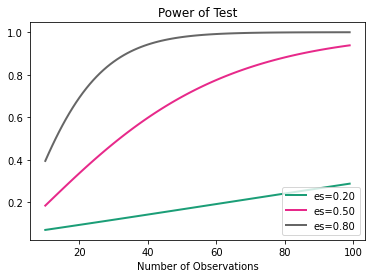

In [5]:
power_obj.plot_power(nobs=np.arange(10,100), effect_size=[0.2, 0.5, 0.8], alpha=0.05)
plt.show()

<hr style="border-top: 5px solid black;">

<div id="objective4" class="alert alert-block alert-warning" style="font-size:16px; border:1px solid black; padding:10px"><center><h1><br><font color="blue">Python code explained.</font></h1></center><br>
</div>
<div style="font-size:16px; border:1px solid black; padding:10px">
    <ul><strong><u>Dependencies</u></strong>
        <li><code>import <a href="https://numpy.org/">numpy</a> as np</code> is a fundamental package for scientific computer used in python.</li><br>        
        <li><code><a href="https://www.statsmodels.org/stable/stats.html?highlight=power#module-statsmodels.stats.power">statsmodels.stats.power</a></code>  is a power module that implements power and sample size calculations for t-test, normal based tests, F-tests and Chisquare goodness of fit test.</li><br> 
        <li><code>TTestIndPower</code> is the Statistical Power calculations for t-test for two independent sample.</li><br>
        <li><code>import <a href="https://matplotlib.org/">matplotlib</a>.pyplot as plt</code> is a comprehensive library for creating static, animated, and interactive visualizations in Python.</li><br>        
    </ul>
    <ul><strong><u>Variable Assignment</u></strong>
        <li>There are three variables we need in this example
            <ol>
                <li><strong>Effect Size</strong>: <em>is the quantified magnitude of a result present in the population.</em> In this example we want to see an effect size of 0.90 (90%).</li>
                <li><strong>Level of significance \(\alpha\)</strong>: <em>is the the probability of rejecting the null hypothesis when it is true</em>.  in this example we set this to 0.05 (5%).</li>
                <li><strong>Power \(\alpha\)</strong>: <em>is the the probability of defecting an effect, given that the there exist a true effect.</em>.  in this example we set this to 0.9 (90%).</li>
            </ol>
        </li><br>        
    </ul>
    <ul><strong><u>Instantiate the Model</u></strong>
        <li><code>power_obj = TTestIndPower()</code>instantiate the T-test for independent samples, and saves to the variable <code>power_obj</code>.</li><br>        
        <li><code>sample_size = np.ceil(power_obj.<a href="https://www.statsmodels.org/stable/generated/statsmodels.stats.power.TTestPower.solve_power.html">solve_power</a>(effect_size=effect_size, alpha=alpha_signifiance, power = power))</code>: solves the parameter of the power of a one sample t-test.
        <ul><strong>Parameters:</strong>
                <li><strong><code>effect_size</code> float:</strong> standardized effect size, mean divided by the standard deviation. effect size has to be positive.</li>
                <li><strong><code>alpha</code> float or interval (0,1):</strong> significance level, e.g. 0.05, is the probability of a type I error, that is wrong rejections if the Null Hypothesis is true.</li>
                <li><strong><code>power</code> float or interval (0,1):</strong> power of the test, e.g. 0.8, is one minus the probability of a type II error. Power is the probability that the test correctly rejects the Null Hypothesis if the Alternative Hypothesis is true.</li>
                <li><strong><code>alternative</code> str ('two-sided' default or 'one-sided'):</strong> power of the test, e.g. 0.8, is one minus the probability of a type II error. Power is the probability that the test correctly rejects the Null Hypothesis if the Alternative Hypothesis is true.</li>              
            </ul><br>
        </li><br> 
        <li><code>np.<a href="https://numpy.org/doc/stable/reference/generated/numpy.ceil.html">ceil()</a></code>, returns the ceiling of the input element-wise. In this example, it rounded our sample size to a floating int. Sample must be a discrete number. The results were saved to the variable <code>sample_size</code>.</li><br>
    </ul>
    <ul><strong><u>Plot power curves</u></strong>
        <li>This step is intended to demonstrate how varying the effect and sample size changes the power of the experiment.</li><br>        
        <li><code><a href="https://www.statsmodels.org/stable/generated/statsmodels.stats.power.TTestPower.plot_power.html">plot_power()</a></code> This step uses the plot_power method that plots the power with a number of observations or effect sizes on the a-axis.
        <ul><strong>Parameters:</strong>
                <li><strong><code>dep_var</code> {‘nobs’, ‘effect_size’, ‘alpha’}:</strong> This specifies which variable is used for the horizontal axis. If dep_var=’nobs’ (default), then one curve is created for each value of effect_size. If dep_var=’effect_size’ or alpha, then one curve is created for each value of nobs.</li>
                <li><strong><code>nobs</code> {scalar, array_like}:</strong> specifies the values of the number of observations in the plot. In this example we went from 10 to 100</li>
                <li><strong><code>alpha</code> {float, array_like}:</strong> The significance level (type I error) used in the power calculation. Can only be more than a scalar, if dep_var='alpha'.</li>            
            </ul><br>
        </li><br> 
        <li>The plot_power method returns a figure.</li><br>
    </ul>     
</div>

<hr style="border-top: 5px solid black;">

<div id="objective5" class="alert alert-block alert-warning" style="font-size:16px; border:1px solid black; padding:10px"><center><h1><br><font color="blue">Special considerations.</font></h1></center><br>
</div>
<div style="font-size:16px; border:1px solid black; padding:10px">
    <ul>
        <li>The test used assumes normality.</li><br>        
        <li>If the distribution is skewed and the sample size is small, then you may not be able to calculate the power.</li><br> 
        <li>Calculating the sample size using a power analysis requires several assumptions about the model be made.</li><br>
        <li>The formula used to calculate power also depends on the statistical model, the one used in this example is for t-test for two independent samples.</li><br>        
        <li>The larger the effect size, the higher the power for a given sample size.</li><br>        
        <li>The larger the effect size, the smaller the sample size needed to achieve a given level of power.</li><br> 
        <li>an accurate estimate of effect size is key to a good power analysis.</li><br>
        <li>Good estimates of effect size often come from the existing literature or pilot studies.</li>
    </ul>
</div>

<hr style="border-top: 5px solid black;">